In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
#importing dataset
dailyActivity = pd.read_excel('dailyActivity_merged.xlsx')

In [3]:
dailyActivity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-12-04 00:00:00,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


Performing data cleaning and manipulation:

In [4]:
# Checking datatypes of columns to spot inconsistency
# Checking no of rows and columns
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
#Checking for null values in each column
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
# Checking no of unique IDs in dataset 
id_unique = len(pd.unique(dailyActivity["Id"]))
id_unique

33

In [7]:
#converting ActivityDate column to correct type
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"])
dailyActivity.info()

#printing first 5 values of the column to check
dailyActivity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-12-04
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
dailyActivity.at[0,"ActivityDate"] = "2016-04-12"

Observations after performing data cleaning and manipulations:
1. There are 33 unique IDs instead of 30.
2. There are no null values in any columns.
3. Datatype of column ActivityDate is wrong. So it was converted to correct data type.
4. Data frame has 940 rows and 15 columns.
5. First entry of ActivityDate column was in wrong format "2014-12-04" insteas of "2106-04-12". Corrected it.

In [9]:
#creating a new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

#using reindex() to rearrange columns
dailyActivity_df = dailyActivity.reindex(columns = new_cols)
dailyActivity_df.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [45]:
#Filling up DayOfTheWeek column 
dailyActivity_df["DayOfTheWeek"] = dailyActivity_df["ActivityDate"].dt.day_name()
dailyActivity_df["DayOfTheWeek"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [46]:
#filling up TotalExerciseMinutes columns
dailyActivity_df["TotalExerciseMinutes"] = dailyActivity_df["VeryActiveMinutes"] + dailyActivity_df["FairlyActiveMinutes"] + dailyActivity_df["LightlyActiveMinutes"]+dailyActivity_df["SedentaryMinutes"]
dailyActivity_df.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


In [54]:
#filling up TotalExerciseHours column
dailyActivity_df["TotalExerciseHours"] = round(dailyActivity_df["TotalExerciseMinutes"]/60)
dailyActivity_df.head(10)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863
5,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,761,13.0,1728
6,1503960366,2016-04-18,Monday,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1440,24.0,1921
7,1503960366,2016-04-19,Tuesday,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,1120,19.0,2035
8,1503960366,2016-04-20,Wednesday,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1063,18.0,1786
9,1503960366,2016-04-21,Thursday,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1076,18.0,1775


Observations after performing data manipulations:
1. Created a new column DayOfTheWeek by separating the date into day of the week for further analysis.
2. Created new column TotalExerciseMinutes being the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes and SedentaryMinutes.
3. Created new column TotalExerciseHours by converting new column TotalExerciseMinutes to number of hours.

In [48]:
#analyzing data by pulling up statistics
dailyActivity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


So from above values we can say:
1. Avg steps = 7637, avg total dist - 5.4km. So steps are below recommended level of 10k.
2. Sedentary minutes= 991 mins which is very high. Total exercise mins = 1218. SO sedentary minutes make up 81% of total avg mins.
3. Total exercise hours = 20 
3. Avg calories burnt = 2303. Cannot be interpreted as it depends on many factors.

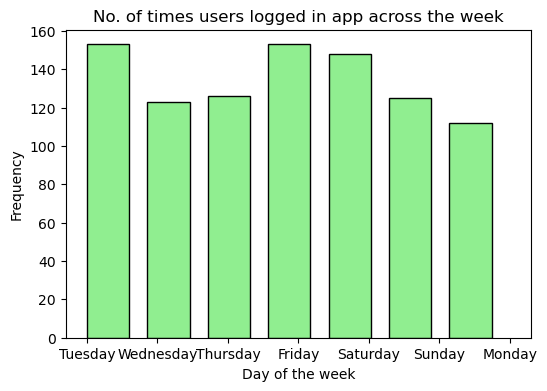

In [49]:
# plotting the no of times users log in in a week
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(dailyActivity_df.DayOfTheWeek, bins = 7, width = 0.6, color = "lightgreen", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.show()

From above histogram we can conclude:
1. Users typically remember to login on Tuesdays, Friday and Saturday.
2. Frequency of logging decreases on Wednesday,Thursday,Sunday and Monday.

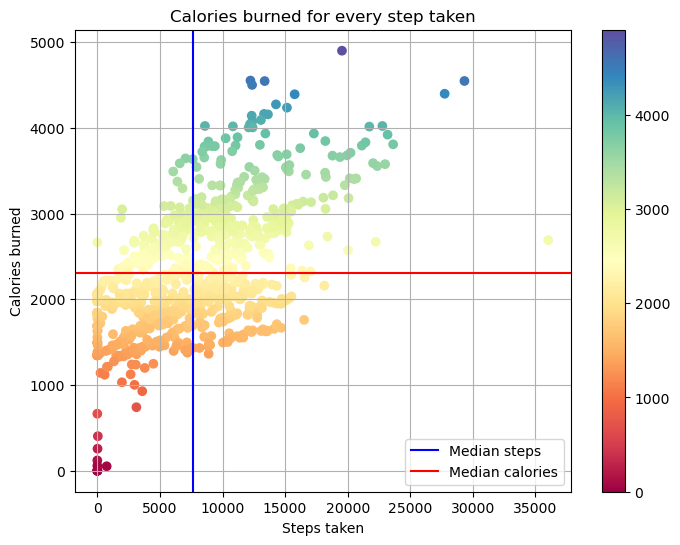

In [15]:
#plotting calories burnt vs total steps
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(dailyActivity_df.TotalSteps, dailyActivity_df.Calories, alpha = 1, c =dailyActivity_df.Calories, cmap ="Spectral" )

#adding annotations
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation ="vertical")
plt.axvline(median_steps, color="Blue", label="Median steps")
plt.axhline(median_calories, color="Red", label="Median calories")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

Observations:
1. Positive correlation
2. max calories burnt is between 0-15k steps. After that rate of calories burn decreases.
3. 0 steps = 0 calories burnt
4. One point where steps >35k but calories burnet <3000. This can happen due to false calculations/wrong usage.

16.516666666666666


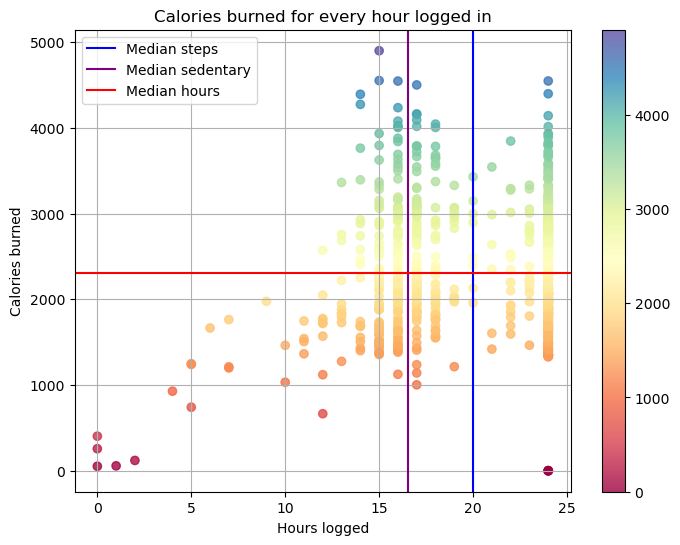

In [16]:
#plotting calories burnt vs total hours logged in
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(dailyActivity_df.TotalExerciseHours, dailyActivity_df.Calories, 
            alpha = 0.8, c = dailyActivity_df.Calories, 
            cmap = "Spectral")

# adding annotations
# mean sedentaryminutes /60 = median_sedentary
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60
print(median_sedentary)

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged in")
plt.legend()
plt.grid(True)
plt.show()

Observations:
1. Showing weak positive correlation. increase in no of hours logged in doesnot increase calories burned. This maybe due to the large amount of sedentary hours(approx 17hrs)
2. 0 hours logged in corresponds to zero calories burned.
3. An unique value at 24 hrs- calories burned is 0 even when user is logged in for 24 hrs. 

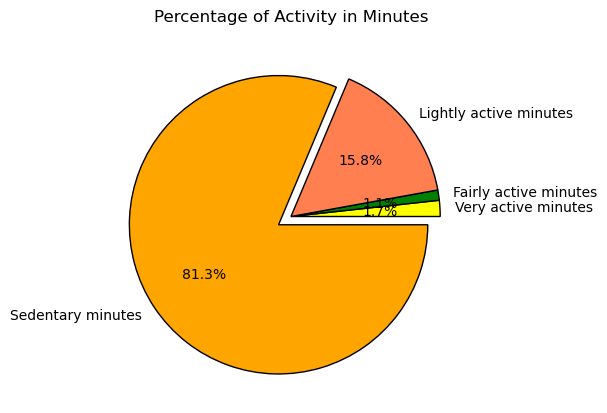

In [17]:
VeryActiveMinutes = dailyActivity_df["VeryActiveMinutes"].sum()
FairlyActiveMinutes = dailyActivity_df["FairlyActiveMinutes"].sum()
LightlyActiveMinutes = dailyActivity_df["LightlyActiveMinutes"].sum()
SedentaryMinutes = dailyActivity_df["SedentaryMinutes"].sum()

slices = [VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours =["yellow","green","coral","orange"]
explode = [0,0,0,0.1]
plt.style.use("default")
plt.figure(figsize=(6,6))
plt.pie(slices, labels = labels, colors = colours, wedgeprops = {"edgecolor": "black"}, explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

Observations:
1. Sedentary minutes take up 81.3%
2. Users are not using FitBit to track their fitness since lightly ,fairly and highly active minutes is very small in %
3. Users are using it mainly for tracking inactive movements.

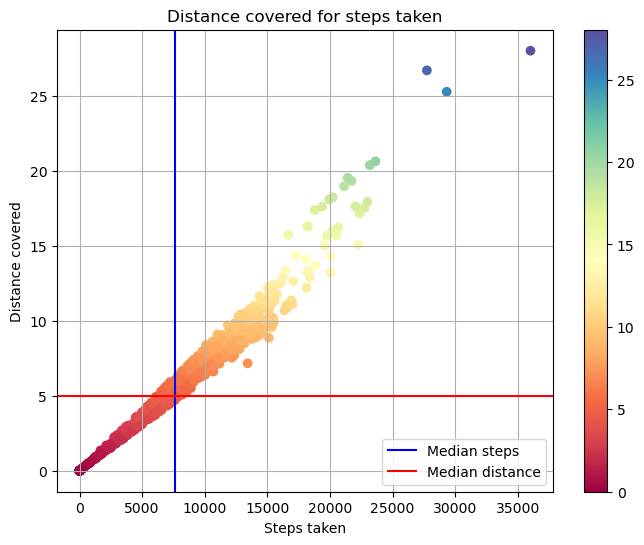

In [18]:
#plotting steps taken vs distance covered
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(dailyActivity_df.TotalSteps, dailyActivity_df.TotalDistance, alpha = 1, c =dailyActivity_df.TotalDistance, cmap ="Spectral" )

#adding annotations
median_distance = 5
median_steps = 7637

plt.colorbar(orientation ="vertical")
plt.axvline(median_steps, color="Blue", label="Median steps")
plt.axhline(median_distance, color="Red", label="Median distance")
plt.xlabel("Steps taken")
plt.ylabel("Distance covered")
plt.title("Distance covered for steps taken")
plt.grid(True)
plt.legend()
plt.show()

Observations:
1. Shows positive correlation.
2. Maximum users step count is between 0-15k covering 0-13 km. This is good because ideally an active person should take 10k steps each day covering approximately 8 km. 
3. Unusual data points - 2 points with steps taken > 25k covering >25 km and 1 point with >35k steps covering nearly 30km.
4. o steps = 0 distance covered.

In [19]:
#importing sleep_merged.csv dataset for analysis
sleep = pd.read_csv("sleepDay_merged.csv")

In [20]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [21]:
# Checking datatypes of columns to spot inconsistency
# Checking no of rows and columns
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [22]:
#Checking for null values in each column
sleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [23]:
# Checking no of unique IDs in dataset 
id_unique = len(pd.unique(sleep["Id"]))
id_unique

24

In [24]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [25]:
#converting SleepDay column to correct type
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])
sleep.info()

#printing first 5 values of the column to check
sleep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [26]:
#Filling up DayOfTheWeek column 
sleep["WeekDay"] = sleep["SleepDay"].dt.day_name()
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [27]:
# creating a new dataframe from dailyActivity_df 
Activity = dailyActivity_df[['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 
                             'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']].copy()
                            
Activity.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,773,1040,17.0,1863


In [28]:
#renaming few columns in sleep dataframe
sleep.rename(columns = {'SleepDay':'ActivityDate', 'WeekDay':'DayOfTheWeek'}, inplace = True)
sleep.head()

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfTheWeek
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [64]:
merged_df = pd.merge(Activity,sleep,on =["Id","ActivityDate","DayOfTheWeek"],how = "inner")
merged_df.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,13162,8.50,728,1094,18.0,1985,1,327,346
1,1503960366,2016-04-13,Wednesday,10735,6.97,776,1033,17.0,1797,2,384,407
2,1503960366,2016-04-15,Friday,9762,6.28,726,998,17.0,1745,1,412,442
3,1503960366,2016-04-16,Saturday,12669,8.16,773,1040,17.0,1863,2,340,367
4,1503960366,2016-04-17,Sunday,9705,6.48,539,761,13.0,1728,1,700,712


In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    266 non-null    int64         
 1   ActivityDate          266 non-null    datetime64[ns]
 2   DayOfTheWeek          266 non-null    object        
 3   TotalSteps            266 non-null    int64         
 4   TotalDistance         266 non-null    float64       
 5   SedentaryMinutes      266 non-null    int64         
 6   TotalExerciseMinutes  266 non-null    int64         
 7   TotalExerciseHours    266 non-null    float64       
 8   Calories              266 non-null    int64         
 9   TotalSleepRecords     266 non-null    int64         
 10  TotalMinutesAsleep    266 non-null    int64         
 11  TotalTimeInBed        266 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 27.0+ KB


In [66]:
#filling up TotalExerciseHours column
merged_df["TotalHoursAsleep"] = round(merged_df["TotalMinutesAsleep"]/60)
merged_df.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
0,1503960366,2016-04-12,Tuesday,13162,8.50,728,1094,18.0,1985,1,327,346,5.0
1,1503960366,2016-04-13,Wednesday,10735,6.97,776,1033,17.0,1797,2,384,407,6.0
2,1503960366,2016-04-15,Friday,9762,6.28,726,998,17.0,1745,1,412,442,7.0
3,1503960366,2016-04-16,Saturday,12669,8.16,773,1040,17.0,1863,2,340,367,6.0
4,1503960366,2016-04-17,Sunday,9705,6.48,539,761,13.0,1728,1,700,712,12.0


In [32]:
merged_df.describe()

,Id,TotalSteps,TotalDistance,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
count,2.660000e+02,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,4.952908e+09,8693.714286,6.156429,725.616541,989.353383,16.500000,2426.894737,1.124060,415.650376,454.105263,6.936090
std,2.076708e+09,4162.424064,3.063324,158.195376,143.149464,2.392204,761.151429,0.352383,119.857407,128.207807,2.018699
min,1.503960e+09,42.000000,0.030000,2.000000,6.000000,0.000000,403.000000,1.000000,59.000000,65.000000,1.000000
25%,3.977334e+09,5422.500000,3.707500,647.250000,927.750000,15.250000,1889.000000,1.000000,360.250000,403.000000,6.000000
50%,4.702922e+09,9169.500000,6.450000,724.000000,988.000000,16.000000,2201.500000,1.000000,427.500000,461.000000,7.000000
75%,6.775889e+09,11477.000000,8.112500,784.250000,1043.000000,17.000000,2923.750000,1.000000,483.750000,515.500000,8.000000
max,8.792010e+09,22359.000000,17.190001,1265.000000,1398.000000,23.000000,4900.000000,3.000000,775.000000,961.000000,13.000000


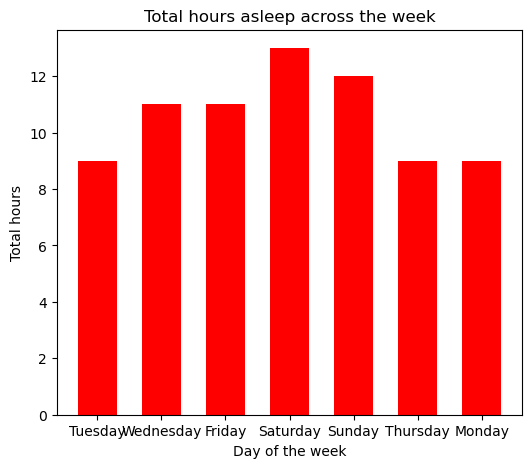

In [33]:
# plotting the total hours asleep in a week
plt.style.use("default")
plt.figure(figsize=(6,5)) 
plt.bar(merged_df["DayOfTheWeek"],merged_df["TotalHoursAsleep"],width = 0.6, color = "red")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Total hours")
plt.title("Total hours asleep across the week")
plt.show()

Observations:
1. Highest hours of sleep recorded in weekends, saturday being the highest(>12 hrs).
2. Sleep during weekdays is lowest.

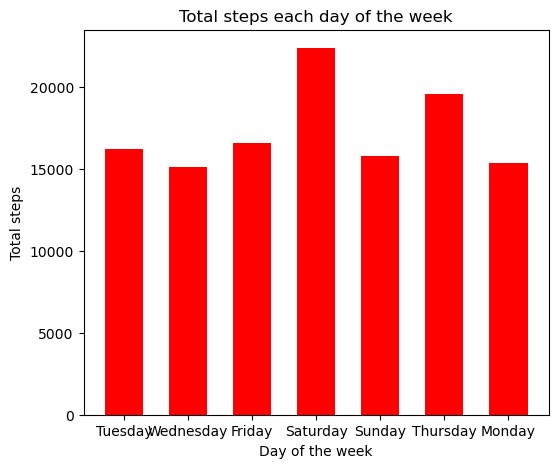

In [61]:
# plotting the total hours asleep in a week
plt.style.use("default")
plt.figure(figsize=(6,5)) 
plt.bar(merged_df["DayOfTheWeek"],merged_df["TotalSteps"],width = 0.6, color = "red")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Total steps")
plt.title("Total steps each day of the week")
plt.show()

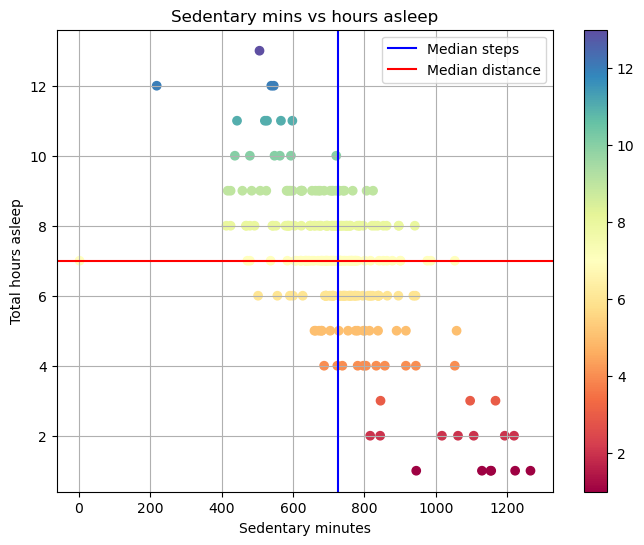

In [60]:
#plotting steps taken vs distance covered
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(merged_df.SedentaryMinutes, merged_df.TotalHoursAsleep, alpha = 1, c =merged_df.TotalHoursAsleep, cmap ="Spectral" )

#adding annotations
mediann_ssedentarymins = 725
median_hours_slept = 7

plt.colorbar(orientation ="vertical")
plt.axvline(mediann_ssedentarymins, color="Blue", label="Median steps")
plt.axhline(median_hours_slept, color="Red", label="Median distance")
plt.xlabel("Sedentary minutes")
plt.ylabel("Total hours asleep")
plt.title("Sedentary mins vs hours asleep")
plt.grid(True)
plt.legend()
plt.show()

Observations:
1. It shows a negative correlation.
2. More sedentary minutes gives less amount of sleep.

Conclusions:
1. Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.Major drawback here because FitBit was designed to track personal health parameters.
2. Inconsistent logging done by users in a week.
3. Majority of user's step count is between 0 - 15000.
4. A weak positive correlation was found between hours logged un by users and colries burnt. This is due to the hige number of sedentary minutues.
5. Negative correlation was found between sedentary minutes and total hours active. It indicated the need to do some sort of exercise so that total hours of sleep can be adequate.

How these conclusions are applicable to Bellabeat customers?
From the above findings we can encourage Bellabeat users to use their products for tracking health parameters and not just use it for sedentary activities. We can encourage them to take care of their health and fitness.